In [2]:
from scipy import stats
# from statsmodels.stats.weightstats import ztest, ttest_ind

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

## Importing experimental results

Reading the experimental results here, these depend on...
* The algorithm used to predict most influential node set (Greedy++, Page Rank, Degree, Random)
* The threshold used to determine when a node is turned active (linear, concave, convex, majority vote)
* The data set

The CSV files contain info on...

* `Size`: Size of seed set
* `Influence`: The predicted influence for a given setting, i.e. combination of values from the setting space defined above
* `Node Runtime`: Time required to calculate prediction for most influential vertex set
* `Inf Runtime`: Time required to calculate influence of given vertex set

### NetHEPT

In [3]:
df_greedy_nethept_linear = pd.read_csv("Greedy++_output_NetHept_linear/Influence.csv")
df_pagerank_nethept_linear = pd.read_csv("PageRank_output_NetHept_linear/Influence.csv")
df_degree_nethept_linear = pd.read_csv("Degree_output_NetHept_linear/Influence.csv")
df_random_nethept_linear = pd.read_csv("Random_output_NetHept_linear/Influence.csv")

In [4]:
df_greedy_nethept_convex = pd.read_csv("Greedy++_output_NetHept_convex/Influence.csv")
df_pagerank_nethept_convex = pd.read_csv("PageRank_output_NetHept_convex/Influence.csv")
df_degree_nethept_convex = pd.read_csv("Degree_output_NetHept_convex/Influence.csv")
df_random_nethept_convex = pd.read_csv("Random_output_NetHept_convex/Influence.csv")

In [5]:
df_degree_nethept_concave = pd.read_csv("Degree_output_NetHept_concave/Influence.csv")

In [6]:
df_greedy_nethept_majority = pd.read_csv("Greedy++_output_NetHept_majority/Influence.csv")
df_pagerank_nethept_majority = pd.read_csv("PageRank_output_NetHept_majority/Influence.csv")
df_degree_nethept_majority = pd.read_csv("Degree_output_NetHept_majority/Influence.csv")
df_random_nethept_majority = pd.read_csv("Random_output_NetHept_majority/Influence.csv")

### NetPhy

In [7]:
df_greedy_netphy = pd.read_csv("Greedy++_output_NetPhy_linear/Influence.csv")
df_pagerank_netphy = pd.read_csv("PageRank_output_NetPhy_linear/Influence.csv")
df_degree_netphy = pd.read_csv("Degree_output_NetPhy_linear/Influence.csv")
df_random_netphy = pd.read_csv("Random_output_NetPhy_linear/Influence.csv")

### Epinions

In [8]:
df_greedy_epinions = pd.read_csv("Greedy++_output_Epinions_linear/Influence.csv")
df_pagerank_epinions = pd.read_csv("PageRank_output_Epinions_linear/Influence.csv")
df_degree_epinions = pd.read_csv("Degree_output_Epinions_linear/Influence.csv")
df_random_epinions = pd.read_csv("Random_output_Epinions_linear/Influence.csv")

### Epinions IC

In [9]:
df_greedy_epinions_IC = pd.read_csv("Greedy++_output_Epinions_linear/Influence_IC.csv")
df_pagerank_epinions_IC = pd.read_csv("PageRank_output_Epinions_linear/Influence_IC.csv")
df_degree_epinions_IC = pd.read_csv("Degree_output_Epinions_linear/Influence_IC.csv")
df_random_epinions_IC = pd.read_csv("Random_output_Epinions_linear/Influence_IC.csv")

## Statistical tests

Attempting the following tests...

* **Mann Whitney U test**: To inspect effect of algorithm on influence, data obtained depend on seed set size and follow no normal distribution, therefore using a non-parametric test here. Furthermore, since each run of any given setting includes generation of random numbers we are using a non-paired test
* **Unpaired t-test**: For a given seed set size inspect effect of algorithm on influence over multiple runs (here obtained values are reasoned to be independent and normally distributed around some mean)
* **Comparison w/ original authors**: Probably also some test to compare our obtained values with those from the original authors...

### Comparing algorithms (various seed set sizes)

In [32]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_pagerank_nethept[['Influence']])

MannwhitneyuResult(statistic=199.5, pvalue=0.30301264010261997)

In [81]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_degree_nethept[['Influence']])

MannwhitneyuResult(statistic=181.0, pvalue=0.16325855660250066)

In [34]:
stats.mannwhitneyu(df_greedy_nethept[['Influence']], df_random_nethept[['Influence']])

MannwhitneyuResult(statistic=29.5, pvalue=8.217521574816841e-07)

### Comparing algorithms (same seed set size, multiple runs)

In [127]:
infl_random = []
infl_degree = []
infl_pagerank = []

for i in range(40):
    infl_random.append(pd.read_csv(f"Random_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])
    infl_degree.append(pd.read_csv(f"Degree_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])
    infl_pagerank.append(pd.read_csv(f"PageRank_output_NetHept_linear_iter{i}/Influence.csv").Influence[0])

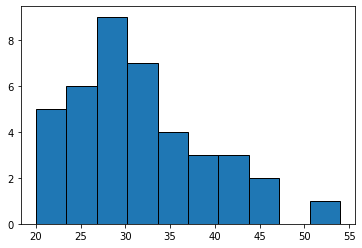

In [121]:
plt.hist(runtimes_random, edgecolor='black')
plt.show()

In [122]:
stat, p = stats.shapiro(runtimes_random)

if p > 0.05:
    print("Random influences: Normally distributed")
else:
    print("Random influences: Not(!) normally distributed")

Random influences: Normally distributed


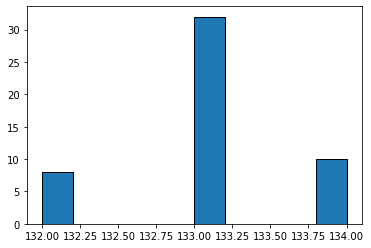

In [124]:
plt.hist(infl_pagerank, edgecolor='black')
plt.show()

In [125]:
stat, p = stats.shapiro(infl_pagerank)

if p > 0.05:
    print("PageRank influences: Normally distributed")
else:
    print("PageRank influences: Not(!) normally distributed")

PageRank influences: Not(!) normally distributed


In [128]:
stats.ttest_ind(infl_pagerank, infl_degree)

Ttest_indResult(statistic=903.2004244895463, pvalue=1.5610930801930885e-158)

## Visualization

* Visualizing effect of algorithm on influence for given data sets
* Visualizing run time of determining the prediction for most influencial node set for given data set, algorithm (threshold: linear)

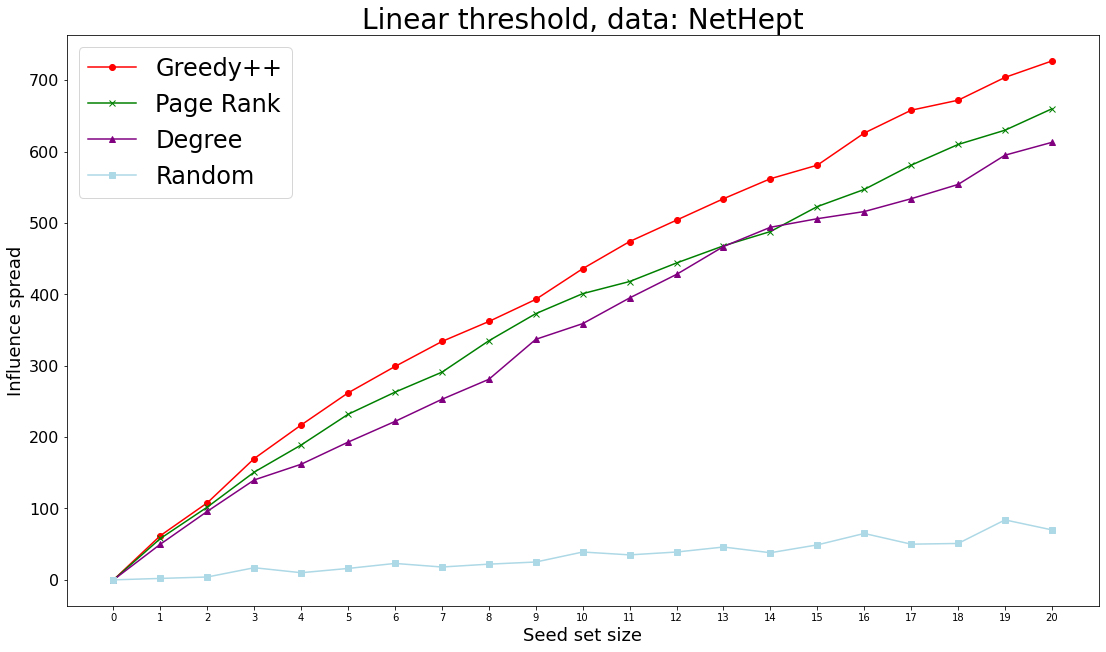

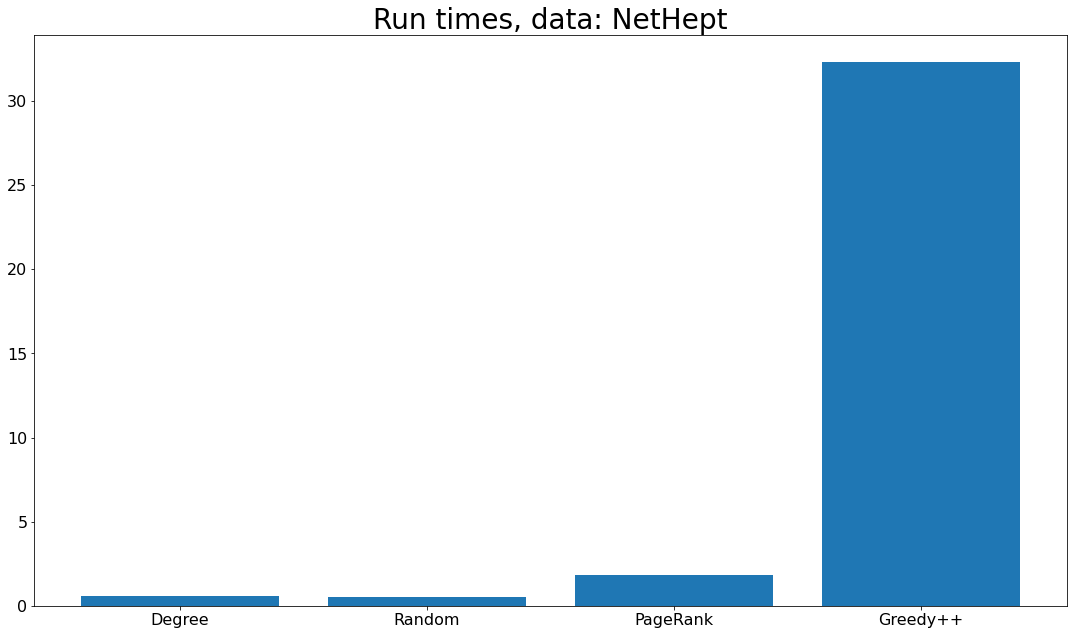

In [5]:
def plot_inf(data, df_greedy, df_pagerank, df_degree, df_random, threshold):
    plt.title(f"{threshold} threshold, data: {data}", fontsize=28)
    plt.plot(df_greedy.Size, df_greedy.Influence, marker="o", color="red", )
    plt.plot(df_pagerank.Influence, marker="x", color="green")
    plt.plot(df_degree.Influence, marker="^", color="purple")
    plt.plot(df_random.Influence, marker="s", color="lightblue")

    plt.legend(['Greedy++', 'Page Rank', 'Degree', 'Random'], fontsize=24)
    plt.xticks(np.arange(0, 21))
    plt.xlabel("Seed set size", fontsize=18)
    plt.ylabel("Influence spread", fontsize=18)
    plt.yticks(fontsize=16)

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.show()
    
    plt.title(f"Run times, data: {data}", fontsize=28)
    plt.bar(range(4), [(sum(df_degree.InfRuntime)/len(df_degree.InfRuntime)), 
                       (sum(df_random.InfRuntime)/len(df_random.InfRuntime)),
                       (sum(df_pagerank.InfRuntime)/len(df_pagerank.InfRuntime)),
                       (sum(df_greedy.InfRuntime)/len(df_greedy.InfRuntime))])
    plt.xticks(range(4), ['Degree', 'Random', 'PageRank', 'Greedy++'], fontsize=16)
    plt.yticks(fontsize=16)
    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)
    plt.show()
    
plot_inf("NetHept", 
         df_greedy_nethept_linear, 
         df_pagerank_nethept_linear, 
         df_degree_nethept_linear, 
         df_random_nethept_linear,
         "Linear")

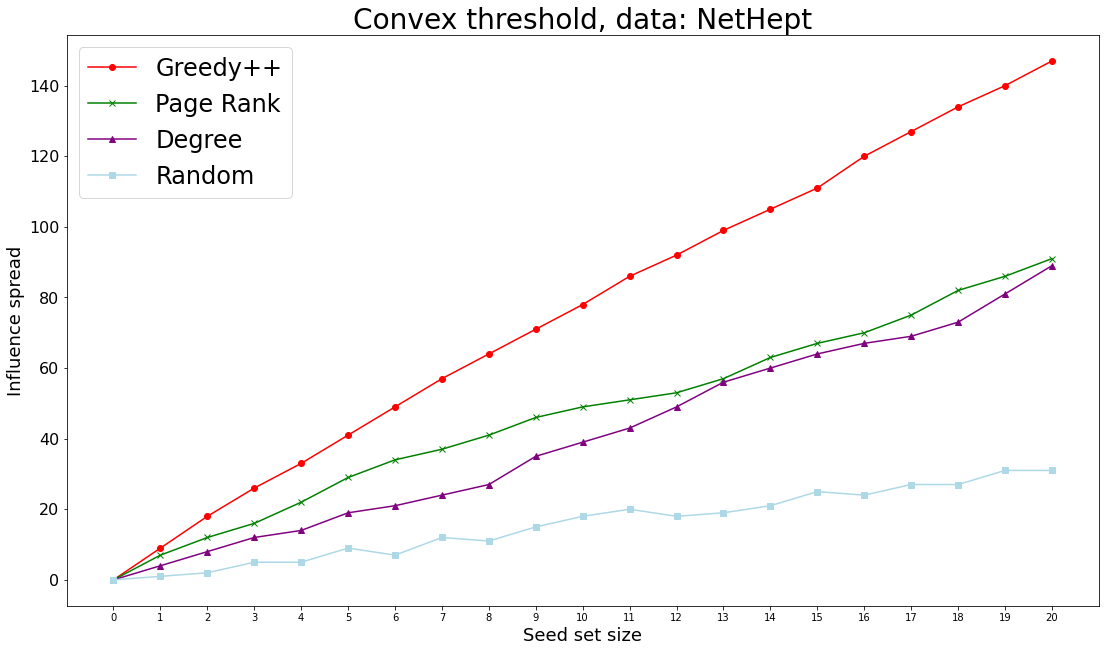

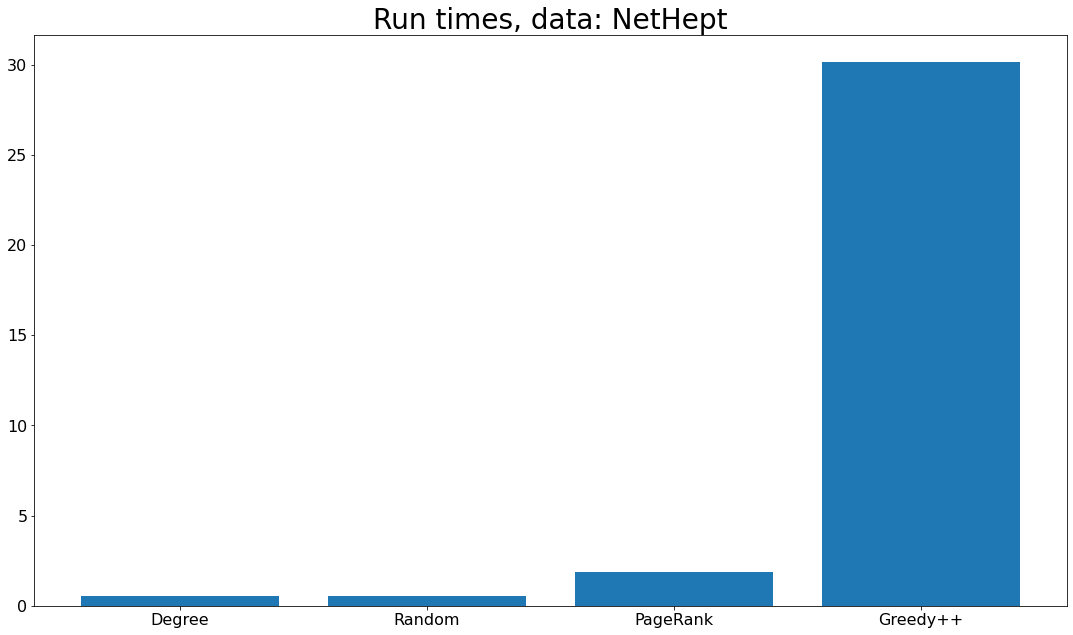

In [8]:
plot_inf("NetHept", 
         df_greedy_nethept_convex, 
         df_pagerank_nethept_convex, 
         df_degree_nethept_convex, 
         df_random_nethept_convex,
         "Convex")

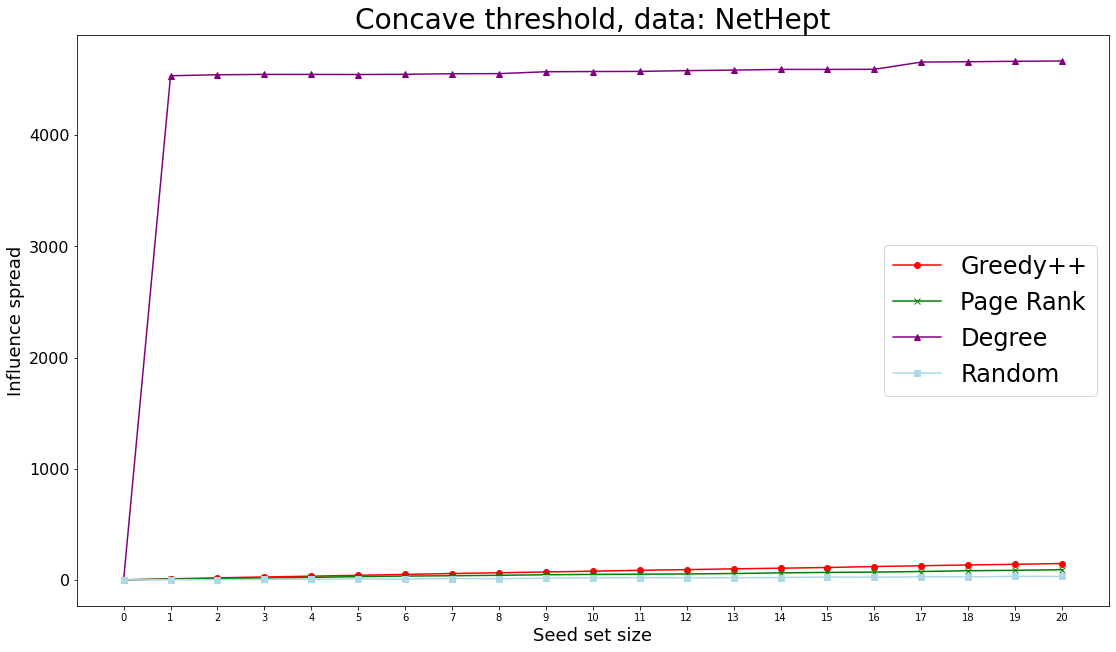

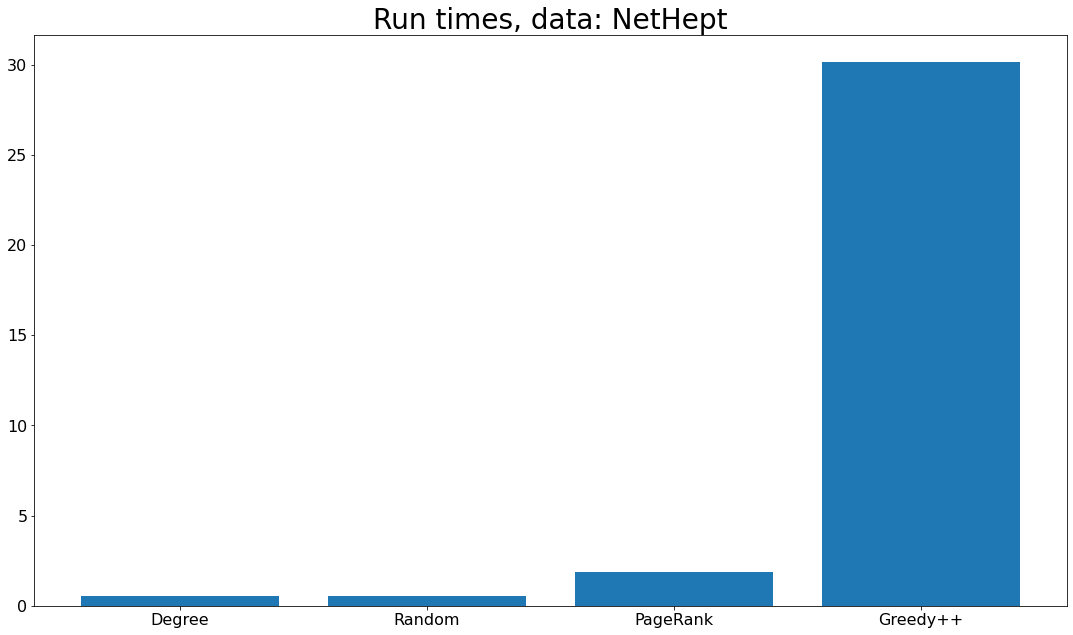

In [10]:
plot_inf("NetHept", 
         df_greedy_nethept_convex, 
         df_pagerank_nethept_convex, 
         df_degree_nethept_concave, 
         df_random_nethept_convex,
         "Concave")

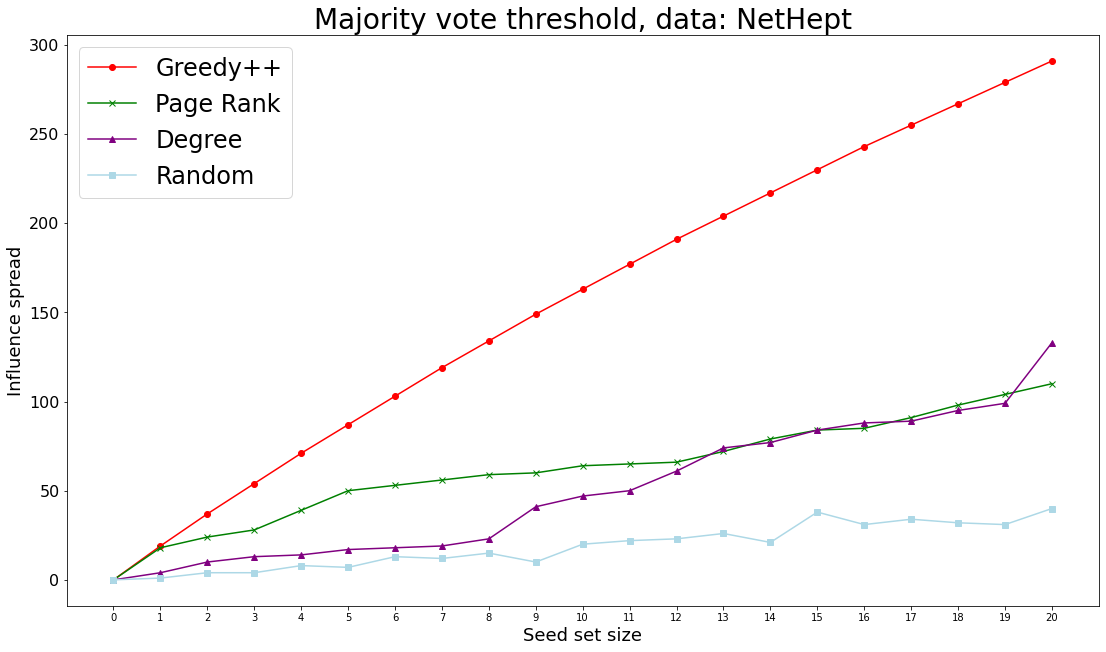

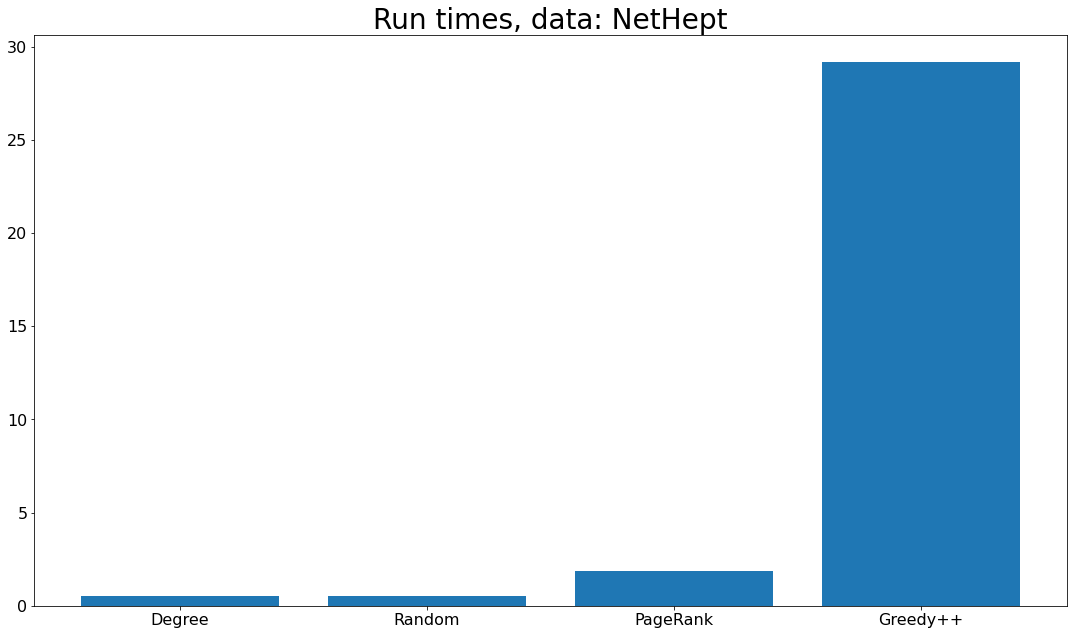

In [18]:
plot_inf("NetHept", 
         df_greedy_nethept_majority, 
         df_pagerank_nethept_majority, 
         df_degree_nethept_majority, 
         df_random_nethept_majority,
         "Majority vote")

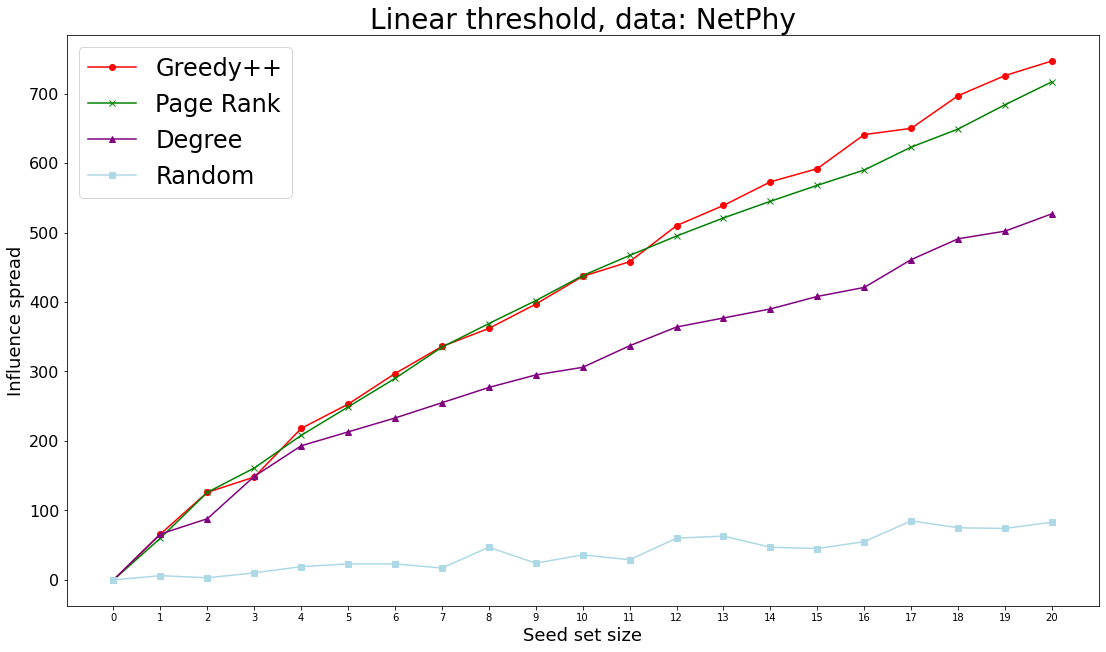

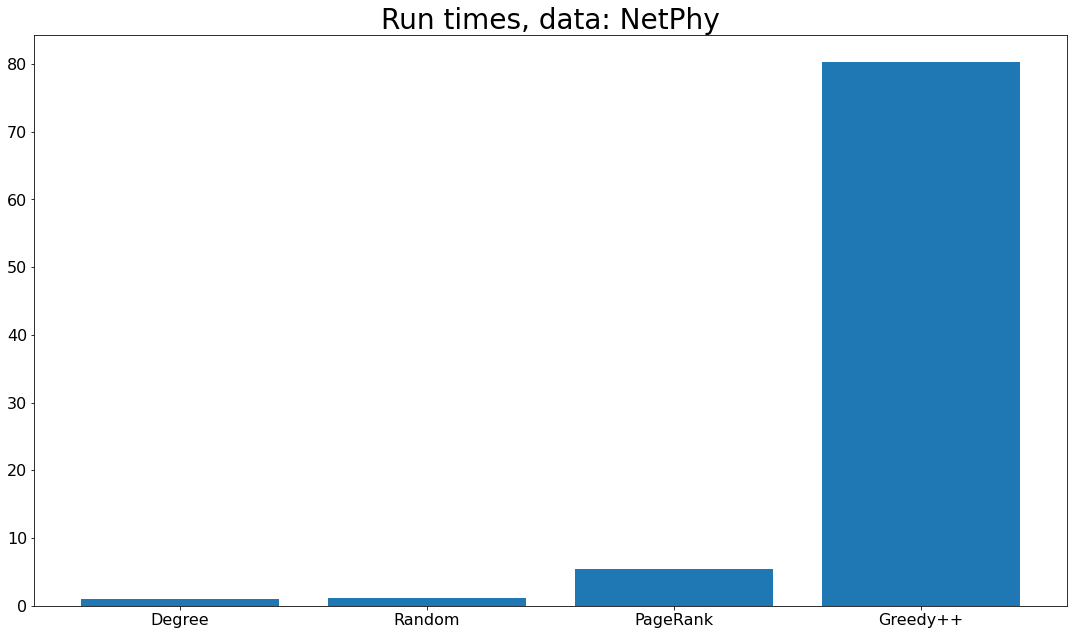

In [61]:
plot_inf("NetPhy", df_greedy_netphy, df_pagerank_netphy, df_degree_netphy, df_random_netphy,
         "Linear")

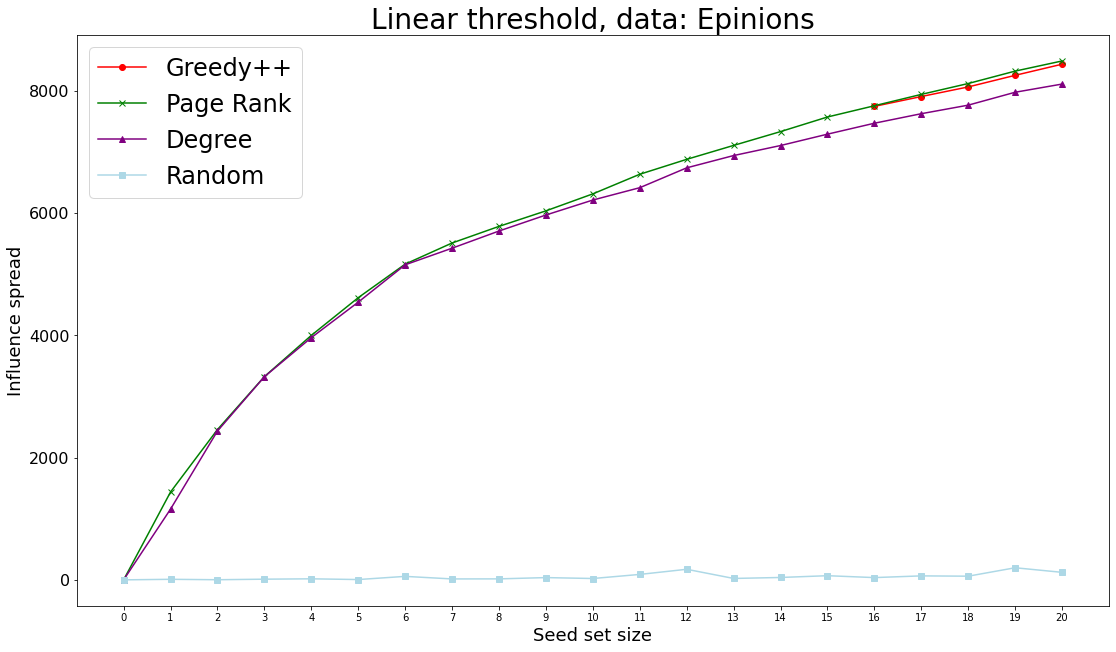

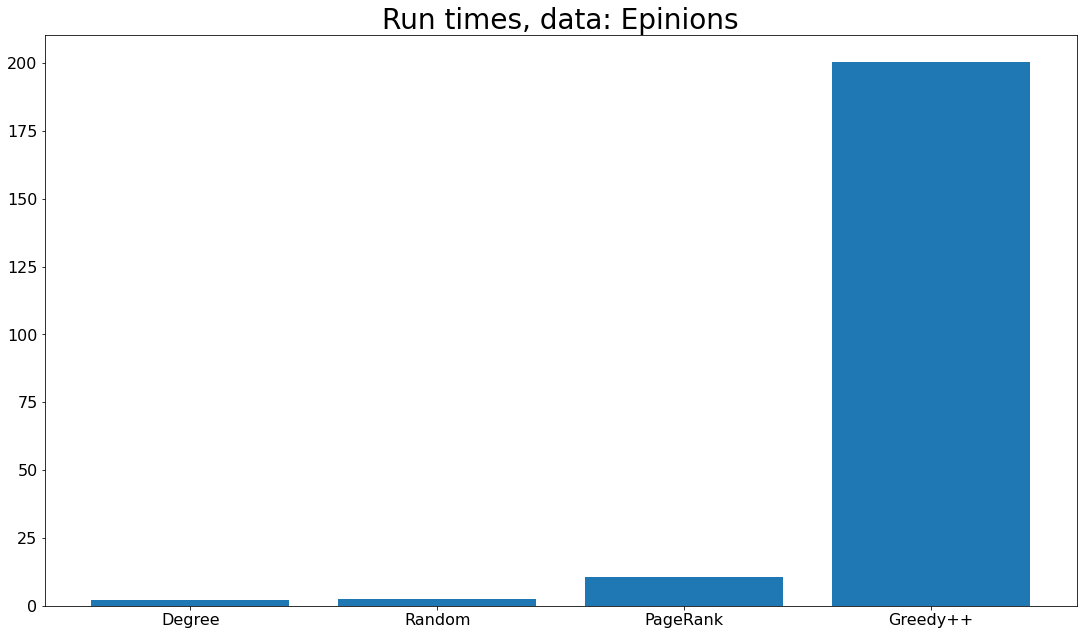

In [132]:
plot_inf("Epinions", df_greedy_epinions, 
         df_pagerank_epinions, df_degree_epinions, df_random_epinions, "Linear")

## Comparison with Published Results

In [13]:
def get_reference_result(dataset, algorithm, threshold):
    path = f"Reference_Results/{dataset}_{threshold}_data.csv"
    df = pd.read_csv(path, header=0, skiprows=[1])
    cols = df.columns.values
    new_cols = []
    colname = None
    for i, col in enumerate(cols):
        if i % 2 == 0:
            colname = col
            new = colname + "_X"
        else:
            new = colname + "_Y"
        new_cols.append(new)
    df.columns = new_cols
    return df[[f"{algorithm}_Y"]]

In [14]:
def plot_reference_comparison(df_greedy, df_page, df_degree, df_random, dataset: str, threshold: str):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(df_greedy.Size, df_greedy.Influence, marker="o", color="red", linewidth=2)
    ax.plot(df_page.Influence, marker="x", color="green", linewidth=2)
    ax.plot(df_degree.Influence, marker="^", color="purple", linewidth=2)
    ax.plot(df_random.Influence, marker="s", color="lightblue", linewidth=2)
    
    ref_greedy = get_reference_result(dataset, "Greedy++", threshold)
    ref_pagerank = get_reference_result(dataset, "PageRank", threshold)
    ref_degree = get_reference_result(dataset, "Degree", threshold)
    ref_random = get_reference_result(dataset, "Random", threshold)
    
    ax.plot(ref_greedy.index, ref_greedy, marker="o", color="red", 
            linewidth=1, linestyle="--", alpha=0.85) #, mec="black")
    ax.plot(ref_pagerank.index, ref_pagerank, marker="x", color="green", linewidth=1, linestyle="--", alpha=0.85)
    ax.plot(ref_degree.index, ref_degree, marker="^", color="purple", linewidth=1, linestyle="--", alpha=0.85)
    ax.plot(ref_random.index, ref_random, marker="s", color="lightblue", linewidth=1, linestyle="--", alpha=0.85)
    
    
    ax.legend(['Greedy++', 'Page Rank', 'Degree', 'Random', 'Reference', 'Reference', 'Reference', 'Reference'], 
              fontsize=12, ncol=2)
    ax.set_xticks(np.arange(0, 21))
    ax.set_xlabel("Seed set size", fontsize=12)
    ax.set_ylabel("Influence spread", fontsize=12)
    ax.set_title(f"Comparison to Published Results of {dataset} {threshold} threshold", fontsize=16)
    # ax.set_yticks(fontsize=16)
    plt.savefig(f"./plots/ref_comp_{dataset}_{threshold}.png", dpi=250)

### NetHEPT linear

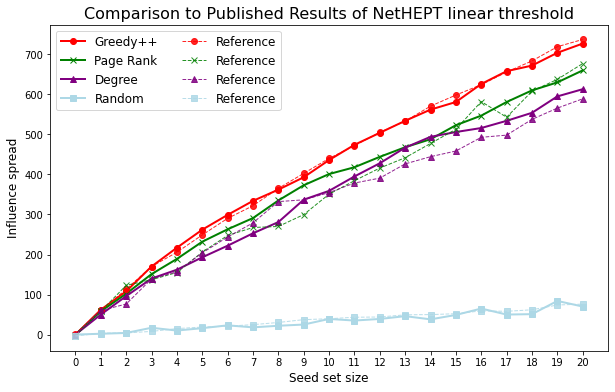

In [15]:
plot_reference_comparison(df_greedy_nethept_linear, df_pagerank_nethept_linear, df_degree_nethept_linear, df_random_nethept_linear,
                       dataset="NetHEPT", threshold="linear")

### NetHEPT concave

### NetHEPT convex

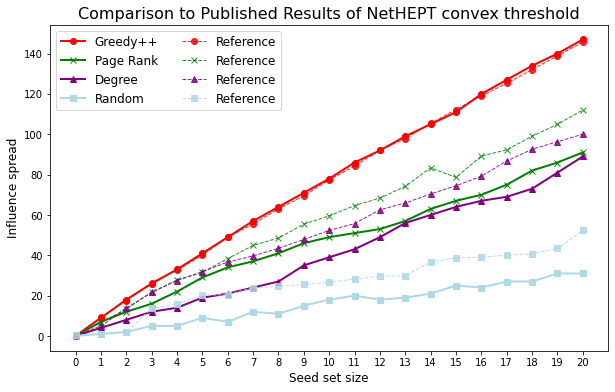

In [167]:
plot_reference_comparison(df_greedy_nethept_convex, df_pagerank_nethept_convex, df_degree_nethept_convex, df_random_nethept_convex,
                       dataset="NetHEPT", threshold="convex")

### NetHEPT majority

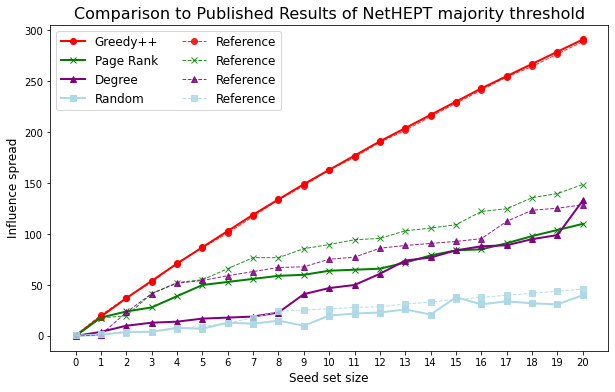

In [168]:
plot_reference_comparison(df_greedy_nethept_majority, df_pagerank_nethept_majority, df_degree_nethept_majority, df_random_nethept_majority,
                       dataset="NetHEPT", threshold="majority")

### NetPhy linear

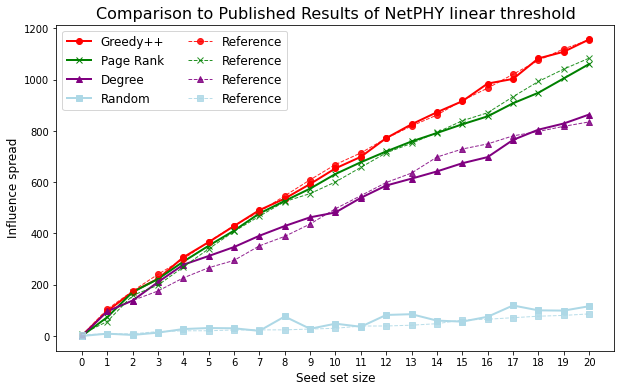

In [169]:
plot_reference_comparison(df_greedy_netphy, df_pagerank_netphy, df_degree_netphy, df_random_netphy,
                       dataset="NetPHY", threshold="linear")

### Epinions linear

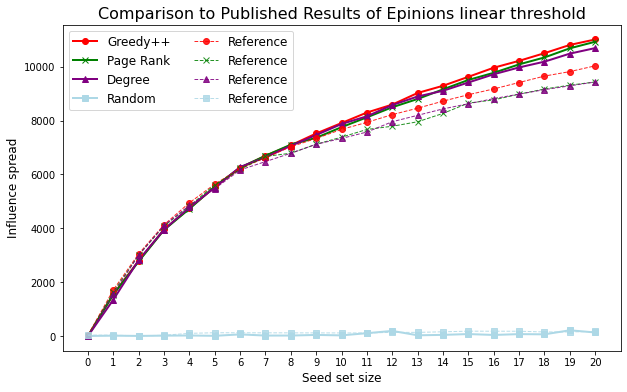

In [178]:
plot_reference_comparison(df_greedy_epinions, df_pagerank_epinions, df_degree_epinions, df_random_epinions,
                       dataset="Epinions", threshold="linear")

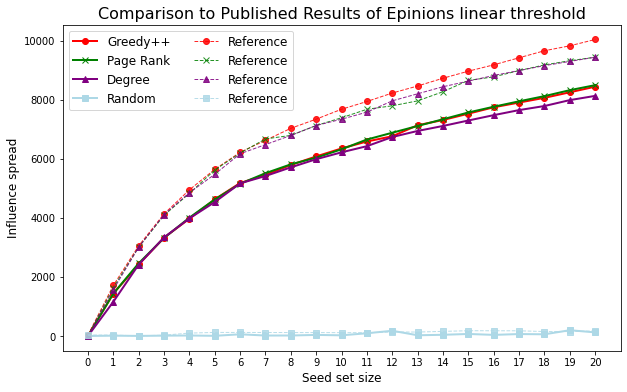

In [180]:
plot_reference_comparison(df_greedy_epinions_IC, df_pagerank_epinions_IC, df_degree_epinions_IC, df_random_epinions_IC,
                       dataset="Epinions", threshold="linear")

## t-Test of Residuals

In [10]:
import scipy
scipy.__version__

'1.6.0'

In [16]:
def t_test(dataset, threshold):
    result_df = pd.read_csv(f"Greedy++_output_{dataset}_{threshold}/Influence.csv")
    reference = get_reference_result(dataset, "Greedy++", threshold)
    
    residuals = result_df["Influence"].values - reference["Greedy++_Y"].values
    mad = np.mean(np.absolute(residuals))
    tstat, pvalue = stats.ttest_1samp(residuals, popmean = 0, alternative="two-sided")
    s = "HAS to be rejected" if pvalue < 0.1 else "CANNOT be rejected"
    print(f"The value of the test statistic is {tstat} with a p-value of {pvalue}.\n" + 
          f"With a conficence level of 90% the Null-Hypothesis {s}.\n" + 
          f"The MAD of the residuals is {mad}.")

In [17]:
t_test("NetHept", "linear")

The value of the test statistic is -0.84188532528978 with a p-value of 0.409806540851013.
With a conficence level of 90% the Null-Hypothesis CANNOT be rejected.
The MAD of the residuals is 6.768164653714916.


In [18]:
t_test("NetHept", "convex")

The value of the test statistic is 3.3869469953014466 with a p-value of 0.0029281593241648864.
With a conficence level of 90% the Null-Hypothesis HAS to be rejected.
The MAD of the residuals is 0.8942062109378336.


In [20]:
t_test("NetHept", "majority")

The value of the test statistic is 4.141535282496739 with a p-value of 0.0005052806454155839.
With a conficence level of 90% the Null-Hypothesis HAS to be rejected.
The MAD of the residuals is 1.328692118344106.


In [21]:
t_test("NetPhy", "linear")

The value of the test statistic is -1.3344503741492322 with a p-value of 0.19705145692688492.
With a conficence level of 90% the Null-Hypothesis CANNOT be rejected.
The MAD of the residuals is 8.740217611677998.


Although the Null-Hypothesis has to be rejected for convex and majority thresholds the mean absolute deviations for the residuals is very small and might be due to errors in the data extraction process.

In [22]:
t_test("Epinions", "linear")

The value of the test statistic is 3.437983839956548 with a p-value of 0.0026028820087545474.
With a conficence level of 90% the Null-Hypothesis HAS to be rejected.
The MAD of the residuals is 403.004378762999.
